In [2]:
#dependencies for the project
import gymnasium as gym
import gym_BinPack3D
from gym_BinPack3D.envs import Box, Rotate
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [ ]:
CWD = os.path.join(os.getcwd(), '')
DATA_DIR = os.path.join(CWD, 'data')
GIF_DIR = os.path.join(CWD, 'gifs')
TENSORBOARD_DIR = os.path.join(CWD, 'tensorboard')
os.makedirs(DATA_DIR, exist_ok=True)
os.makedirs(GIF_DIR, exist_ok=True)
os.makedirs(TENSORBOARD_DIR, exist_ok=True)


In [4]:
#register the environment
gym.envs.register(
    id='BinPack3D-v1',
    entry_point='gym_BinPack3D.envs:PackingGame',
)

#define the environment.
#container_size: size of the container in 3D
#boxSeqGenerator: how the boxes are generated.
#enabled_rotations: which rotations are allowed for the boxes
#n_foreseeable_box: how many boxes are shown to the agent
#box_set: the set of boxes that are used in the environment. 

env = gym.make('BinPack3D-v1', 
                container_size = (25, 4, 4),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP, Rotate.XY, Rotate.XZ, Rotate.YZ],
                n_foreseeable_box = 3,
                minSideLen = 1,
                maxSideLen = 2,
            )


env.action_space, env.observation_space

using CUT-2 logic box sequence


(MultiDiscrete([100   4]),
 Dict('coming_boxes': Box(0.0, 25.0, (3, 3), float32), 'height_map': Box(0.0, 4.0, (25, 4), float32), 'valid_placement_mask': MultiBinary((4, 25, 4))))

### Load Baseline Agent
Here we load an agent with perfect information

In [5]:
#load the environment with a baseline agent
env = gym.make('BinPack3D-v1', 
             container_size = (25, 4, 4),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 3,
                minSideLen = 1,
                maxSideLen = 2,
            )

#default container size is (9, 11, 13), with maxSideLen = 5, minSideLen = 2
#container size for our game is (25, 4, 4), with maxSideLen = 2, minSideLen = 1

frames = []
obs = env.reset()
#set environment to render rgb_array
frame = env.render()
rewards = []
while True:
    frames.append(frame)
    # we cheat the game by look at cut process info and get the 
    # correct pos to place box, achieving perfect packing
    box = env.boxSeqGenerator.next_N_boxes()[0]
    pos = (box.x,box.y)
    act_pos = env.position_to_actionIdx(pos)
    rot = Rotate.NOOP
    action = (act_pos, rot)

    obs, reward, done,_, info = env.step(action)
    frame = env.render()
    # print(reward,done,info)
    print(pos, action, reward)
    rewards.append(reward + rewards[-1] if len(rewards) > 0 else reward)
    
    if done: break
        
env.render()

imageio.mimsave(GIF_DIR+"/baseline.gif", frames)


using CUT-2 logic box sequence
(2, 2) (10, <Rotate.NOOP: 0>) 48.0
(10, 2) (42, <Rotate.NOOP: 0>) 40.0
(3, 1) (13, <Rotate.NOOP: 0>) 47.0


/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int64
  logger.warn(
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int32
  logger.warn(
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:335: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined)

(16, 1) (65, <Rotate.NOOP: 0>) 34.0
(15, 1) (61, <Rotate.NOOP: 0>) 35.0
(8, 1) (33, <Rotate.NOOP: 0>) 42.0
(8, 0) (32, <Rotate.NOOP: 0>) 42.0
(3, 1) (13, <Rotate.NOOP: 0>) 47.0
(10, 0) (40, <Rotate.NOOP: 0>) 40.0
(15, 1) (61, <Rotate.NOOP: 0>) 35.0
(13, 0) (52, <Rotate.NOOP: 0>) 37.0
(7, 0) (28, <Rotate.NOOP: 0>) 43.0
(23, 0) (92, <Rotate.NOOP: 0>) 27.0
(22, 1) (89, <Rotate.NOOP: 0>) 28.0
(13, 1) (53, <Rotate.NOOP: 0>) 37.0
(14, 0) (56, <Rotate.NOOP: 0>) 36.0
(19, 0) (76, <Rotate.NOOP: 0>) 31.0
(5, 1) (21, <Rotate.NOOP: 0>) 45.0
(5, 1) (21, <Rotate.NOOP: 0>) 45.0
(0, 3) (3, <Rotate.NOOP: 0>) 50.0


/home/btg/Documents/GitHub-khlee/CS5446-Project/gym-BinPack3D/gym_BinPack3D/envs/BinPack3DEnv.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


(7, 2) (30, <Rotate.NOOP: 0>) 43.0
(9, 1) (37, <Rotate.NOOP: 0>) 41.0
(5, 3) (23, <Rotate.NOOP: 0>) 45.0
(19, 1) (77, <Rotate.NOOP: 0>) 31.0
(2, 3) (11, <Rotate.NOOP: 0>) 48.0
(17, 1) (69, <Rotate.NOOP: 0>) 33.0
(7, 3) (31, <Rotate.NOOP: 0>) 43.0
(12, 1) (49, <Rotate.NOOP: 0>) 38.0
(8, 1) (33, <Rotate.NOOP: 0>) 42.0
(3, 2) (14, <Rotate.NOOP: 0>) 47.0
(9, 0) (36, <Rotate.NOOP: 0>) 41.0
(16, 3) (67, <Rotate.NOOP: 0>) 34.0
(0, 1) (1, <Rotate.NOOP: 0>) 50.0
(0, 0) (0, <Rotate.NOOP: 0>) 50.0
(21, 3) (87, <Rotate.NOOP: 0>) 29.0
(12, 0) (48, <Rotate.NOOP: 0>) 38.0
(20, 2) (82, <Rotate.NOOP: 0>) 30.0
(5, 3) (23, <Rotate.NOOP: 0>) 45.0
(19, 0) (76, <Rotate.NOOP: 0>) 31.0
(0, 1) (1, <Rotate.NOOP: 0>) 50.0
(23, 0) (92, <Rotate.NOOP: 0>) 27.0
(12, 3) (51, <Rotate.NOOP: 0>) 38.0
(2, 0) (8, <Rotate.NOOP: 0>) 48.0
(2, 2) (10, <Rotate.NOOP: 0>) 48.0
(8, 3) (35, <Rotate.NOOP: 0>) 42.0
(13, 0) (52, <Rotate.NOOP: 0>) 37.0
(22, 0) (88, <Rotate.NOOP: 0>) 28.0
(20, 3) (83, <Rotate.NOOP: 0>) 30.0
(3, 0) (12,

### Using wrapped reward function
We define a perfect agent who has knowledge of the exact order of boxes to be placed in the environment by providing the 'CUT-2' sequence order.

Then, we want to train an agent who does not have knowledge of the exact order of boxes to stack the incoming boxes.

Modifying the reward, we train a PPO and A2C agent using stable_baselines3 to see if the agent is able to change its behavior based on its reward function.
We plot the reward in comparison with the perfect agent to test its performance

In [6]:
#test using a wrapper to modify the reward

from gymnasium import Wrapper

class RewardWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.container_volume = env.container_size[0] * env.container_size[1] * env.container_size[2]
        self.floor_space = env.container_size[0] * env.container_size[1]
        self.prev_floor_space = 0
        print(f"Container dimensions: {env.container_size}, Container volume: {self.container_volume}, Floor space: {self.floor_space}")
        
    def step(self, action):
        obs, reward, done, truncated, info = self.env.step(action)

        base_reward = reward        
        #base reward is the current ratio of boxes placed in the container to the total volume of the container.
        # we want to minimize the floor space used by the boxes and maximize the height of the boxes.
        # we weight the height as a positive reward and the floor space as a negative reward.
        # height should be modified by the max height of the current box.
        ratio_height = obs['height_map'].max() / env.container_size[2]
        # larger height is better. use sigmoid to reward the agent for placing boxes higher. limit the range of the reward to -1 to 1.
        if ratio_height > 1: #this means that the agent has placed a box that is higher than the container. we should penalize this heavily.
            curr_max_height = -100
        else:
            curr_max_height = np.exp(ratio_height**2) + 1
        
        # floor space should be modified by the current floor space of the container. we want to minimize this and penalize the agent for using more floor space.
        curr_floor_space = obs['valid_placement_mask'].sum() / self.floor_space
        # smaller floor space is better. use sigmoid to penalize the agent for using more floor space.
        curr_floor_space = -np.exp(-curr_floor_space**2) * 5

        #reward longer sequences of boxes placed in the container. we want to maximize the number of boxes placed in the container.
        curr_count = info['counter']
        # larger count is better. use sigmoid to reward the agent for placing more boxes. limit the range of the reward to -1 to 1.
        reward_count = (1+np.exp(-curr_count))**-1

        #if action placement is near the x axis, reward the agent
        #get the position of the action in x,y coordinates, and express the x coordinate as a fraction of the container length.
        act_pos = self.env.actionIdx_to_position(action[0])[0] / self.env.container_size[0] -1
        #smaller x position is better. use sigmoid to reward the agent for placing boxes near the x axis. limit the range of the reward to -1 to 1.
        act_x_dist = np.exp(-act_pos**2) *5
        # Encourage starting from the back of the container and filling towards the front
        # if the max x position of the boxes is greater than the position of the current box, penalize the agent
        # get map of boxes placed in the container
        # max_x = obs[]

        x_penalty = (box.x / self.container.dx) * 5  # Increase penalty as x increases


        #modify the reward. base reward is the current ratio of boxes placed in the container to the total volume of the container.
        reward = base_reward + curr_max_height + curr_floor_space + reward_count + act_x_dist - x_penalty
        if done:
            reward = -100

        #add reward details to the info dictionary
        info['base_reward'] = base_reward
        info['max_height'] = curr_max_height
        info['floor_space'] = curr_floor_space
        info['action_x_dist'] = act_x_dist
        info['reward_count'] = reward_count
        info['x_penalty'] = x_penalty

        # print(f"Base reward: {base_reward}, Modified reward: {reward}, Max height: {curr_max_height}, Floor space: {curr_floor_space}")
        
        return obs, reward, done, truncated, info

In [8]:
#use wrapped_env to train a PPO agent
from stable_baselines3 import PPO
from stable_baselines3 import A2C
#import tensorboard for logging

# base_env = gym.make('BinPack3D-v1',
#                 container_size = (25, 4, 4), #(9, 11, 13),
#                     boxSeqGenerator='CUT-2', 
#                     enabled_rotations = [Rotate.NOOP],
#                     n_foreseeable_box = 3,
#                     minSideLen = 1, # 2
#                     maxSideLen = 2, # 5
#                 )

base_env = gym.make('BinPack3D-v1', 
                container_size = (10, 5, 5),
                boxSeqGenerator='random', 
                box_set = [Box(2,1,1), Box(1,1,1)],
                # boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 5,
                # minSideLen = 2,
                # maxSideLen = 5,
            )                
wrapped_env = RewardWrapper(base_env)


2024-04-14 14:21:01.558375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


using CUT-2 logic box sequence
Container dimensions: (25, 4, 4), Container volume: 400, Floor space: 100


/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.container_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.container_size` for environment variables or `env.get_wrapper_attr('container_size')` that will search the reminding wrappers.
  logger.warn(


In [11]:
model_PPO = PPO("MultiInputPolicy", wrapped_env, verbose=1, tensorboard_log=TENSORBOARD_DIR+"/ppo_binpack3d_tensorboard/", device='cuda')
model_PPO.learn(total_timesteps=100000)

#use wrapped_env to train a A2C agent
model_a2c = A2C("MultiInputPolicy", wrapped_env, verbose=1, tensorboard_log=TENSORBOARD_DIR+"/a2c_binpack3d_tensorboard/", device='cpu')
model_a2c.learn(total_timesteps=100000)

#save the model
model_PPO.save(DATA_DIR+"/ppo_reward_wrapper")
model_a2c.save(DATA_DIR+"/a2c_reward_wrapper")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to /home/btg/Documents/GitHub-khlee/CS5446-Project/Documents/GitHub/CS5446_AI_planning/CS5446-Project/tensorboard/ppo_binpack3d_tensorboard/PPO_2


/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.container to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.container` for environment variables or `env.get_wrapper_attr('container')` that will search the reminding wrappers.
  env_spec.additional_wrappers += (wrapper_spec,)
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.container_size to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.container_size` for environment variables or `env.get_wrapper_attr('container_size')` that will search the reminding wrappers.
  env_spec.additional_wrappers += (wrapper_spec,)
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actionIdx_to_position to get variables

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 5.23     |
|    ep_rew_mean     | 79.6     |
| time/              |          |
|    fps             | 443      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 6.16        |
|    ep_rew_mean          | 117         |
| time/                   |             |
|    fps                  | 417         |
|    iterations           | 2           |
|    time_elapsed         | 9           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.012782655 |
|    clip_fraction        | 0.123       |
|    clip_range           | 0.2         |
|    entropy_loss         | -4.6        |
|    explained_variance   | -0.000127   |
|    learning_rate        | 0.

In [16]:
#load the PPO model
model_PPO = PPO.load(DATA_DIR+"/ppo_reward_wrapper", env=wrapped_env)
best_frames = []
best_PPO_rewards = []
obs = model_PPO.env.reset()
frame = model_PPO.env.render(mode="rgb_array")
done = False
#save the longest sequence of frames for the gif
max_framelen = 0
for i in range(1000):
    #count every 100 steps
    if i % 100 == 0:
        print(f"Step: {i}, Best frame length: {max_framelen}")
    PPO_rewards = []
    frames = []
    while not done:
        frames.append(frame)
        action, _state = model_PPO.predict(obs, deterministic=False)
        obs, reward, done,_, info = wrapped_env.step(action.flatten())
        # print(obs, reward, done, info)
        PPO_rewards.append(reward + PPO_rewards[-1] if len(PPO_rewards) > 0 else reward)
        frame = model_PPO.env.render(mode="rgb_array")
        if frame is None:
            print("Frame is None!!")
            break
        # VecEnv resets automatically
        if done:
            obs = model_PPO.env.reset()
    #save the longest sequence of frames for the gif
    if len(frames) > max_framelen:
        max_framelen = len(frames)
        best_frames = frames
        best_PPO_rewards = PPO_rewards
        print(f'info: {info}')
    else:
        frames = []
        done = False

print("Best ppo len: ", len(best_frames))
imageio.mimsave(GIF_DIR+"/ppo_wrapper"+".gif", best_frames)

#load the A2C model
model_a2c = A2C.load(DATA_DIR+"/a2c_reward_wrapper", env=wrapped_env)
best_frames = []
best_A2C_rewards = []
obs = model_a2c.env.reset()
frame = model_a2c.env.render(mode="rgb_array")
done = False
#save the longest sequence of frames for the gif
max_framelen = 0
for i in range(1000):
    #count every 100 steps
    if i % 100 == 0:
        print(f"Step: {i}, Best frame length: {max_framelen}")
    A2C_rewards = []
    frames = []
    while not done:
        frames.append(frame)
        action, _state = model_a2c.predict(obs, deterministic=False)
        obs, reward, done,_, info = wrapped_env.step(action.flatten())
        # print(obs, reward, done, info)
        A2C_rewards.append(reward + A2C_rewards[-1] if len(A2C_rewards) > 0 else reward)
        frame = model_a2c.env.render(mode="rgb_array")
        if frame is None:
            print("Frame is None!!")
            break
        # VecEnv resets automatically
        if done:
            obs = model_a2c.env.reset()
    #save the longest sequence of frames for the gif
    if len(frames) > max_framelen:
        max_framelen = len(frames)
        best_frames = frames
        best_A2C_rewards = A2C_rewards
        print(f'info: {info}')
    else:
        frames = []
        done = False

print("Best a2c len: ", len(best_frames))
imageio.mimsave(GIF_DIR+"/a2c_wrapper"+".gif", best_frames)


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Step: 0, Best frame length: 0
info: {'counter': 13, 'ratio': 0.15, 'base_reward': -200, 'max_height': 3.718281828459045, 'floor_space': -3.694842441294721, 'action_x_dist': 4.968102181895745, 'reward_count': 0.999997739675702, 'x_penalty': 0.0}


/home/btg/Documents/GitHub-khlee/CS5446-Project/gym-BinPack3D/gym_BinPack3D/envs/BinPack3DEnv.py:211: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


info: {'counter': 14, 'ratio': 0.1175, 'base_reward': -200, 'max_height': 3.718281828459045, 'floor_space': -3.9710792630827334, 'action_x_dist': 1.8393972058572117, 'reward_count': 0.9999991684719722, 'x_penalty': 0.0}
info: {'counter': 17, 'ratio': 0.18, 'base_reward': -200, 'max_height': 3.718281828459045, 'floor_space': -4.54186587104634, 'action_x_dist': 1.8393972058572117, 'reward_count': 0.9999999586006244, 'x_penalty': 0.0}
info: {'counter': 21, 'ratio': 0.1225, 'base_reward': -200, 'max_height': 3.718281828459045, 'floor_space': -3.6540564711000196, 'action_x_dist': 1.8393972058572117, 'reward_count': 0.9999999992417439, 'x_penalty': 0.0}
Step: 100, Best frame length: 22
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_166260/3224017745.py", line 22, in <module>
    frame = model_PPO.env.render(mode="rgb_array")
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/stable_baselines3/common/vec_env/dummy_vec_env.py", line 103, in render
    return super().render(mode=mode)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/stable_baselines3/common/vec_env/base_vec_env.py", line 255, in render
    images = self.get_images()
             ^^^^^^^^^^^^^^^^^
  File "/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/stable_baselines3/common/vec_env/dummy_vec_env.py", line 94, in get_images
    return [env.render() for e

In [ ]:
base_env = gym.make('BinPack3D-v1', 
             container_size = (25, 4, 4), #(9, 11, 13),
                boxSeqGenerator='CUT-2', 
                enabled_rotations = [Rotate.NOOP],
                n_foreseeable_box = 3,
                minSideLen = 1, # 2
                maxSideLen = 2, # 5
            )
wrapped_env = RewardWrapper(base_env)


frames = []
obs = wrapped_env.reset()
frame = wrapped_env.render()
wrapped_env_rewards = []
while True:
    frames.append(frame)
    box = wrapped_env.boxSeqGenerator.next_N_boxes()[0]
    pos = (box.x,box.y)
    act_pos = wrapped_env.position_to_actionIdx(pos)
    rot = Rotate.NOOP
    action = (act_pos, rot)

    obs, reward, done,_, info = wrapped_env.step(action)
    frame = wrapped_env.render()
    print(info)
    # print(reward,done,info)
    wrapped_env_rewards.append(reward + wrapped_env_rewards[-1] if len(wrapped_env_rewards) > 0 else reward)
    
    if done: break

wrapped_env.render()
# print(obs)
imageio.mimsave(GIF_DIR+"/modified.gif", frames)

using CUT-2 logic box sequence
Container dimensions: (25, 4, 4), Container volume: 400, Floor space: 100
{'counter': 1, 'ratio': 0.005, 'base_reward': 45.0, 'max_height': 2.064494458917859, 'floor_space': -3.148851907005015, 'action_x_dist': 2.636462120215243, 'reward_count': 0.7310585786300049, 'x_penalty': 1.0}
{'counter': 2, 'ratio': 0.025, 'base_reward': 30.0, 'max_height': 2.2840254166877414, 'floor_space': -3.3620063119850134, 'action_x_dist': 4.803947195761616, 'reward_count': 0.8807970779778823, 'x_penalty': 4.0}
{'counter': 3, 'ratio': 0.035, 'base_reward': 44.0, 'max_height': 2.2840254166877414, 'floor_space': -3.446426552733132, 'action_x_dist': 2.8062186822161745, 'reward_count': 0.9525741268224334, 'x_penalty': 1.2}
{'counter': 4, 'ratio': 0.055, 'base_reward': 28.0, 'max_height': 2.2840254166877414, 'floor_space': -3.148851907005015, 'action_x_dist': 4.928515920612215, 'reward_count': 0.9820137900379085, 'x_penalty': 4.4}


/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int64
  logger.warn(
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/utils/passive_env_checker.py:135: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array dtype to be float32, actual type: int32
  logger.warn(
/home/btg/miniconda3/envs/cs5446_proj/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.boxSeqGenerator to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variab

{'counter': 5, 'ratio': 0.06, 'base_reward': 42.0, 'max_height': 2.2840254166877414, 'floor_space': -3.6540564711000196, 'action_x_dist': 3.1488519070050156, 'reward_count': 0.9933071490757153, 'x_penalty': 1.6}
{'counter': 6, 'ratio': 0.08, 'base_reward': 45.0, 'max_height': 2.7550546569602985, 'floor_space': -1.9894096022560235, 'action_x_dist': 2.636462120215243, 'reward_count': 0.9975273768433653, 'x_penalty': 1.0}
{'counter': 7, 'ratio': 0.085, 'base_reward': 48.0, 'max_height': 2.7550546569602985, 'floor_space': -3.234382123810649, 'action_x_dist': 2.144781993395365, 'reward_count': 0.9990889488055994, 'x_penalty': 0.4}
{'counter': 8, 'ratio': 0.09, 'base_reward': 41.0, 'max_height': 2.7550546569602985, 'floor_space': -3.2770312716342027, 'action_x_dist': 3.3195788166773674, 'reward_count': 0.9996646498695336, 'x_penalty': 1.7999999999999998}
{'counter': 9, 'ratio': 0.095, 'base_reward': 39.0, 'max_height': 2.7550546569602985, 'floor_space': -4.008984279834707, 'action_x_dist': 3

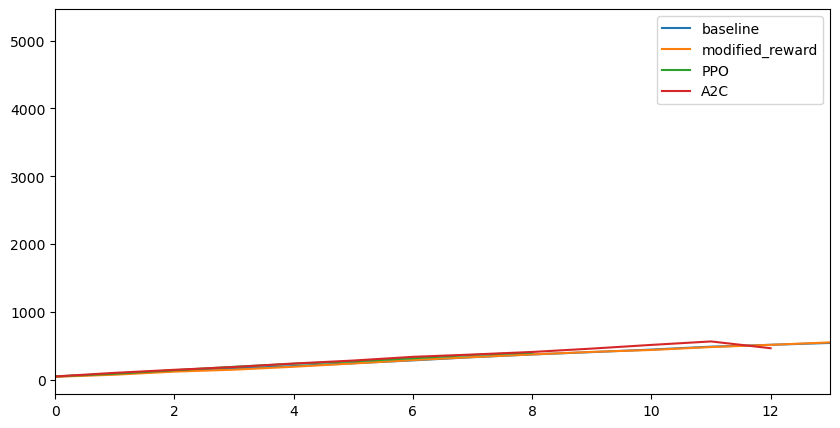

: 

In [21]:
#clear the plots
plt.close("all")
#plot the rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards, label="baseline")
plt.plot(wrapped_env_rewards, label="modified_reward")
plt.plot(PPO_rewards, label="PPO")
plt.plot(A2C_rewards, label="A2C")
#limit the range of the x-axis to the number of steps of A2C
plt.xlim(0, max(len(PPO_rewards), len(A2C_rewards)))
#scale the y-axis to the range of the rewards
# plt.ylim(-4, 50)
plt.legend()
plt.show()

In [ ]:
#flatten the observation space
from gymnasium import ObservationWrapper
import numpy as np

class FlattenObservation(ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        
    def observation(self, obs):
        return np.array(obs).flatten()
    
base_env = gym.make('BinPack3D-v1',
                container_size = (9, 11, 13),
                    boxSeqGenerator='CUT-2', 
                    enabled_rotations = [Rotate.NOOP],
                    n_foreseeable_box = 3,
                    minSideLen = 2,
                    maxSideLen = 5,
                )
wrapped_env = FlattenObservation(base_env)

#we want to 

In [ ]:
#implement a random agent to test the environment
from gymnasium import Wrapper
from gymnasium.spaces import MultiDiscrete
import random
import numpy as np

class RandomAgent(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.Prob = self.calculate_Prob()
        
    def step(self, action):
        obs, reward, done, truncated, info = self.env.step(action)
        return obs, reward, done, truncated, info
    
    def act(self, obs):
        #choose a random position from the action space. action space is a multi-discrete space
        (x, y) = self.env.action_space.sample()
        print(self.env.action_space, x, y, self.env.container_size)
        pos = x
        rot = random.choice(self.env.enabled_rotations)
        return (pos, rot)
    
    def create_agent(self, **kwargs):
        agent = ValueIterationAgent(env = self.env, gamma=0.9, theta=0.0001, max_iter=1000)
        agent.initialize()

        return agent
    
    def calculate_Prob(self):
        #calculate the transition probabilities
        Prob = np.zeros((self.env.observation_space.nvec[0], self.env.action_space.n, self.env.observation_space.nvec[0]))
        for s in range(self.env.observation_space.nvec[0]):
            for a in range(self.env.action_space.n):
                for s_prime in range(self.env.observation_space.nvec[0]):
                    Prob[s, a, s_prime] = self.env.calculate_prob(s, a, s_prime)
                    
        return Prob

class ValueIterationAgent(object):
    def __init__(self, env=None, gamma=0.99, theta=0.001, max_iter=1000):
        self.env = env
        self.gamma = gamma
        self.theta = theta
        self.max_iter = max_iter

        self.disc_actions = self.env.action_space.nvec
        self.disc_states = self.env.observation_space.nvec
        self.Prob = self.env.Prob

    def initialize(self):
        self.value_policy, self.policy_function = self.value_iteration()

    def value_iteration(self):
        value_policy = np.zeros(self.disc_states)
        policy_function = np.zeros(self.disc_states)

        for i in range(self.max_iter):
            delta = 0
            for s in range(self.disc_states):
                v = value_policy[s]
                value_policy[s] = self.calculate_value(s, value_policy)
                delta = max(delta, abs(v - value_policy[s]))

            if delta < self.theta:
                print('Converged at iteration', i)
                break

        for s in range(self.disc_states):
            policy_function[s] = self.calculate_policy(s, value_policy)

        return value_policy, policy_function
    
    def calculate_value(self, s, value_policy):
        max_val = float('-inf')
        for a in range(self.env.action_space.n):
            val = 0
            for s_prime in range(self.disc_states):
                val += self.Prob[s, a, s_prime] * (self.env.R[s, a, s_prime] + self.gamma * value_policy[s_prime])
            max_val = max(max_val, val)
        return max_val
    
    def calculate_policy(self, s, value_policy):
        max_val = float('-inf')
        max_action = 0
        for a in range(self.env.action_space.n):
            val = 0
            for s_prime in range(self.disc_states):
                val += self.Prob[s, a, s_prime] * (self.env.R[s, a, s_prime] + self.gamma * value_policy[s_prime])
            if val > max_val:
                max_val = val
                max_action = a
        return max_action

base_env = gym.make('BinPack3D-v1', 
                    container_size = (9, 11, 13),
                    boxSeqGenerator='CUT-2', 
                    enabled_rotations = [Rotate.NOOP],
                    n_foreseeable_box = 3,
                    minSideLen = 2,
                    maxSideLen = 5,
                    )
wrapped_env = RandomAgent(base_env)

frames = []
obs = wrapped_env.reset()
frame = wrapped_env.render()
rewards = []
for i in range(100):
    frames.append(frame)
    action = wrapped_env.act(obs)
    obs, reward, done,_, info = wrapped_env.step(action)
    frame = wrapped_env.render()
    print(reward,done,info)
    rewards.append(reward)
    

wrapped_env.render()

imageio.mimsave(DATA_DIR+"/random.gif", frames)